# Qutip two qubits error

In this notebook, we re-examine the case in N_Qubits_time_independet_Hamiltonian_Simulation
of simulating two qubits system using sesolve(). Here, however, we take the hamiltonian to be $ \sigma_z \otimes \sigma_z $ and the initial state to be $ |++\rangle$ to eliminate any error that might be caused by the change of basis when diagonalizing the hamiltonian.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

from scipy.integrate import ode

# for analytical exponentiation
from scipy.linalg import expm 
print("done")


done


The simulation will be performed for 100 points between 0 and 10 seconds at 0.1 second step size. Simulation parameters:

In [2]:
w = 1
hbar = 6.626e-34 / (2 * np.pi)
times = []
t = 0
dt = 0.1
max_time = 10
while t < max_time-dt:
    times.append(t)
    t = t + dt

First, we start with the exact soltuion.
## Exact Solution
The hamiltonain is given as:
\begin{equation}
H = w_0 \hbar \sigma_z \otimes \sigma_z = w_0 \hbar \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\end{equation}
The evolution equation is then:
\begin{equation}
\phi(t) = e^{\frac{-iHt}{\hbar}}\phi(0) = e^{-iw_0 \sigma_z \otimes \sigma_zt}\phi(0) = \begin{bmatrix} e^{-iw_0t} & 0 & 0 & 0\\ 0 & e^{iw_0t} & 0 & 0 \\ 0 & 0 & e^{iw_0t} & 0\\ 0 & 0 & 0 & e^{-iw_0t}\end{bmatrix}\phi(0)
\end{equation}

In [3]:
# Initial state
initial_state = (1/2)*np.array([[1], [1], [1], [1]])

# unitary
def u(t):
    return np.array([[np.exp(-1j*w*t), 0, 0, 0], [0, np.exp(1j*w*t), 0, 0], [0, 0, np.exp(1j*w*t), 0], [0, 0, 0, np.exp(-1j*w*t)]])

# perform simulation
exact_states = []
for t in times:
    exact_states.append(np.matmul(u(t), initial_state))
print("done generating exact solution")

done generating exact solution


## Qutip Simulation


In [4]:
# initial state
initial_state = (qutip.basis(4, 0) + qutip.basis(4, 1) + qutip.basis(4, 2) + qutip.basis(4, 3)).unit()

# define state on which to project for expectation 
s_project = [tensor(sigmax(), qeye(2)), tensor(qeye(2), sigmax())]

# hamiltonian
# h = w*hbar*tensor(sigmaz(), sigmaz())
h = w*tensor(sigmaz(), sigmaz())#

# perform simulation
result = sesolve(h, initial_state, times)
qutip_states = result.states
# perform simulation
result = sesolve(h, initial_state, times, s_project)
qutip_expect = result.expect
print("done generating qutip solution")

done generating qutip solution


## Error Analysis
Here, we display the error analysis for the time independent case. The error is defined as the amplitude of the difference between matching vectors at each time step. 


Text(0.5, 1.0, 'Error in sesolve() a for time-independent hamiltonian for two qubit ')

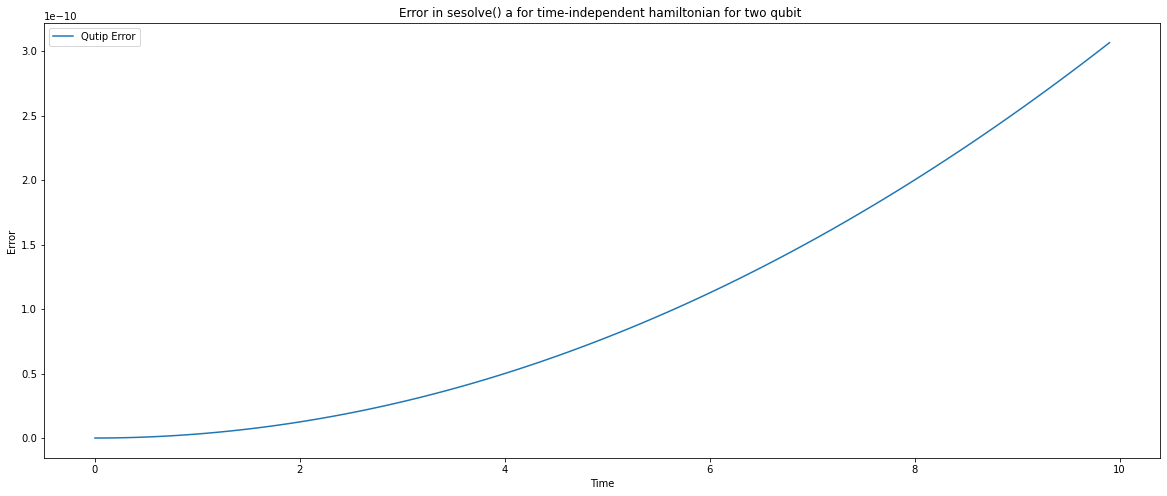

In [5]:
qutip_error = []
for i in range(len(times)):
    y = []
    y.append(qutip_states[i][0] - exact_states[i][0])
    y.append(qutip_states[i][1] - exact_states[i][1])
    y.append(qutip_states[i][2] - exact_states[i][2])
    y.append(qutip_states[i][3] - exact_states[i][3])
    qutip_error.append(np.abs(np.vdot(y, y)))

p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
p.plot(times, qutip_error) 
p.legend(("Qutip Error",))
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.set_title("Error in sesolve() a for time-independent hamiltonian for two qubit ")

Expectaion:

In [6]:
s_00 = np.kron(np.array([[1], [0]]), np.array([[1], [0]]))
s_01 = np.kron(np.array([[1], [0]]), np.array([[0], [1]]))
s_10 = np.kron(np.array([[0], [1]]), np.array([[1], [0]]))
s_11 = np.kron(np.array([[0], [1]]), np.array([[0], [1]])) 

sx_uu = (1/2)*np.kron(np.array([[1], [1]]), np.array([[1], [1]]))
sx_ud = (1/2)*np.kron(np.array([[1], [1]]), np.array([[1], [-1]]))
sx_du = (1/2)*np.kron(np.array([[1], [-1]]), np.array([[1], [1]]))
sx_dd = (1/2)*np.kron(np.array([[1], [-1]]), np.array([[1], [-1]]))

first_expect_x = []
second_expext_x = []
for state in exact_states:

    first_qubit_x_up = np.vdot(sx_uu, state) + np.vdot(sx_ud, state)
    first_qubit_x_down = np.vdot(sx_du, state) + np.vdot(sx_dd, state)
    first_expect_x.append(first_qubit_x_up**2 + first_qubit_x_down**2)
    second_qubit_x_up = np.vdot(sx_uu, state) + np.vdot(sx_du, state)
    second_qubit_x_down = np.vdot(sx_ud, state) + np.vdot(sx_dd, state)
    second_expext_x.append(second_qubit_x_up**2 + second_qubit_x_down**2)
print("done")


done


C:\Users\Majd\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


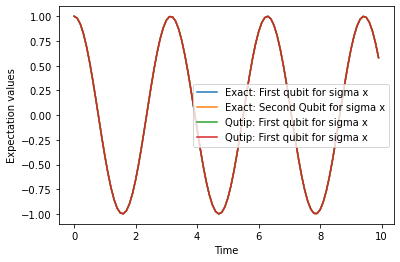

In [7]:
# expectaion plot
fig, ax = plt.subplots()
ax.plot(times, qutip_expect[0]) 
ax.plot(times, qutip_expect[1]) 
ax.plot(times, first_expect_x)
ax.plot(times, second_expext_x)
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Exact: First qubit for sigma x", "Exact: Second Qubit for sigma x", "Qutip: First qubit for sigma x", "Qutip: First qubit for sigma x")) 
plt.show() 


As we can see from these results, the error order of magnitude is as expected. In fact, it is much lower than found in the N_Qubits_time_independet_Hamiltonian_Simulation notebook. After further reviewing the N qubits notebook, we found an error in the code generating the exact solution. Now that the mistake has been found, we will move on to repreoduce the atol, rtol, and number of steps correlation with error. 

In [9]:
# exact simulation for n step size
# unitary
def u(t):
    return np.array([[np.exp(-1j*w*t), 0, 0, 0], [0, np.exp(1j*w*t), 0, 0], [0, 0, np.exp(1j*w*t), 0], [0, 0, 0, np.exp(-1j*w*t)]])

# perform simulation
def exact_simulate(times):
    # Initial state
    initial_state = (1/2)*np.array([[1], [1], [1], [1]])
    exact_states = []
    for t in times:
        exact_states.append(np.matmul(u(t), initial_state))
    return exact_states

def qutip_simulate(times, options):

    # initial state
    initial_state = (qutip.basis(4, 0) + qutip.basis(4, 1) + qutip.basis(4, 2) + qutip.basis(4, 3)).unit()

    # define state on which to project for expectation 
    s_project = [tensor(sigmax(), qeye(2)), tensor(qeye(2), sigmax())]

    # hamiltonian
    # h = w*hbar*tensor(sigmaz(), sigmaz())
    h = w*tensor(sigmaz(), sigmaz())#
    
    if not options:
        result = sesolve(h, initial_state, times)
    else:
        result = sesolve(h, initial_state, times, options = options)
    return result.states

# step size

In [10]:
# generate a times_list(list of list of time point) at which to record the state of the system. Each list of times_list
# represent a different step size-each are an order of magnitude different

max_time = 10
times_list = []

dt = 1
dts = []
for i in range(5):
    dts.append(dt)
    dt = dt/10
    
for dt in dts:
    times = []
    t = 0
    while t < max_time-dt:
        times.append(t)
        t = t + dt
    times_list.append(times)


perform exact simulation at different step sizes:

In [11]:
exact_states_at_different_step_sizes = []
for times in times_list:
    exact_states_at_different_step_sizes.append(exact_simulate(times))
print("done generating exact solution for different step sizes")
    

done generating exact solution for different step sizes


perform qutip simulation at different step sizes:

In [12]:
qutip_states_at_different_step_sizes = []
for times in times_list:
    qutip_states_at_different_step_sizes.append(qutip_simulate(times, None))
print("done generating qutip solution for different step sizes")

done generating qutip solution for different step sizes


Find the error for every time step (The error is defined as the amplitude of the difference between matching vectors at each time step. )

In [13]:
qutip_error_at_different_step_sizes = []
for j in range(len(times_list)):
    qutip_error = []
    qutip_states = qutip_states_at_different_step_sizes[j]
    exact_states =  exact_states_at_different_step_sizes[j]
    for i in range(len(times_list[j])):
        y = []
        y.append(qutip_states[i][0] - exact_states[i][0])
        y.append(qutip_states[i][1] - exact_states[i][1])
        y.append(qutip_states[i][2] - exact_states[i][2])
        y.append(qutip_states[i][3] - exact_states[i][3])
        qutip_error.append(np.abs(np.vdot(y, y)))
    qutip_error_at_different_step_sizes.append(qutip_error)
print("done finding error")

done finding error


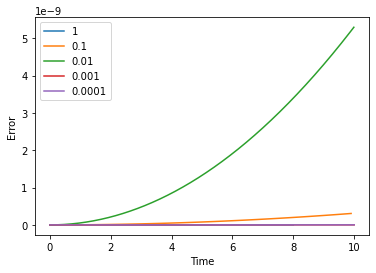

In [32]:
fig, ax = plt.subplots()
for i in range(len(times_list)):
    ax.plot(times_list[i], qutip_error_at_different_step_sizes[i]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Error') 
ax.legend(dts)
plt.show() 


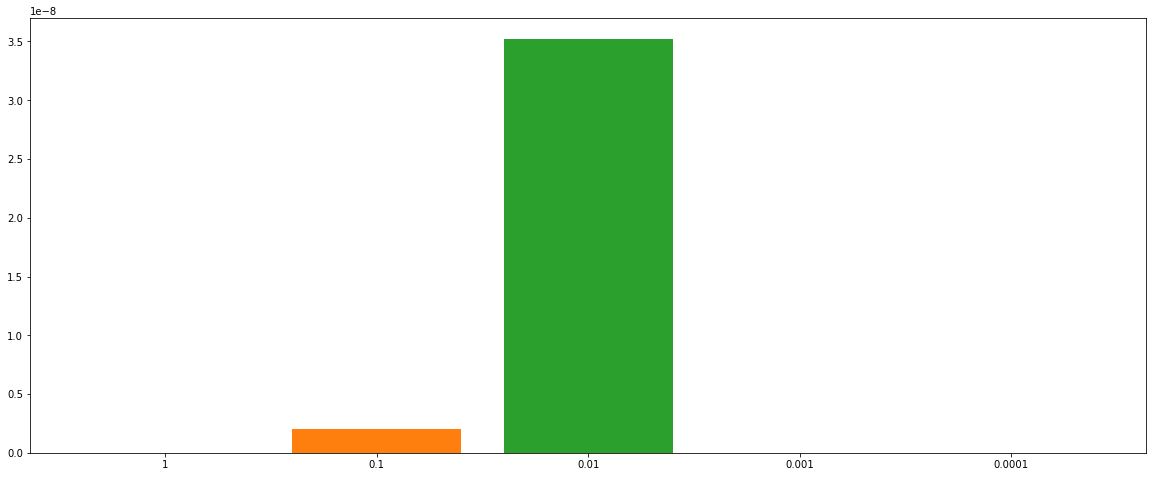

In [23]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(times_list)):
    p.bar(str(dts[i]), np.trapz(times_list[i], qutip_error_at_different_step_sizes[i]))
ax.set_xlabel('Step Size') 
ax.set_ylabel('Area under error curve') 
plt.show() 


# ATOL

In [24]:
# use a constant step size
dt = 0.1
times = []
t = 0
while t < max_time-dt:
    times.append(t)
    t = t + dt

# generate 20 different values of atol
atols = []
atol = 1e-10
atols.append(atol)
for i in range(19):
    atol = atol*np.sqrt(10)
    atols.append(atol)


Generate exact solution at step size dt:

In [25]:
exact_states = exact_simulate(times)
print("done generating exact solution")

done generating exact solution for different step sizes


Generate qutip soultions with different atols:

In [28]:
qutip_atols = []
for atol in atols:
    options = Options(atol = atol)
    qutip_atols.append(qutip_simulate(times, options))
print("done generating qutip solution with differennt atol")

done generating qutip solution with differennt atol


Find error (error defined as the amplitude of the difference between exact state and approximate state):

In [30]:
qutip_atol_error = []
for j in range(len(atols)):
    error = []
    qutip_states = qutip_atols[j]
    exact_states =  exact_states
    for i in range(len(times)):
        y = []
        y.append(qutip_states[i][0] - exact_states[i][0])
        y.append(qutip_states[i][1] - exact_states[i][1])
        y.append(qutip_states[i][2] - exact_states[i][2])
        y.append(qutip_states[i][3] - exact_states[i][3])
        error.append(np.abs(np.vdot(y, y)))
    qutip_atol_error.append(error)
print("done finding error")    

done finding error


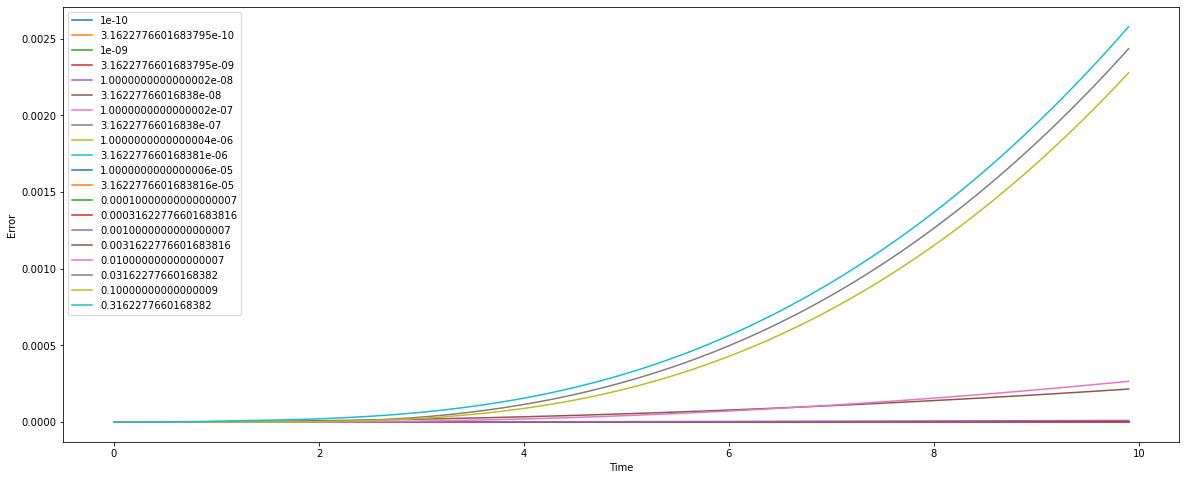

In [39]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(atols)):
    p.plot(times, qutip_atol_error[i]) 
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.legend(atols)
plt.show() 

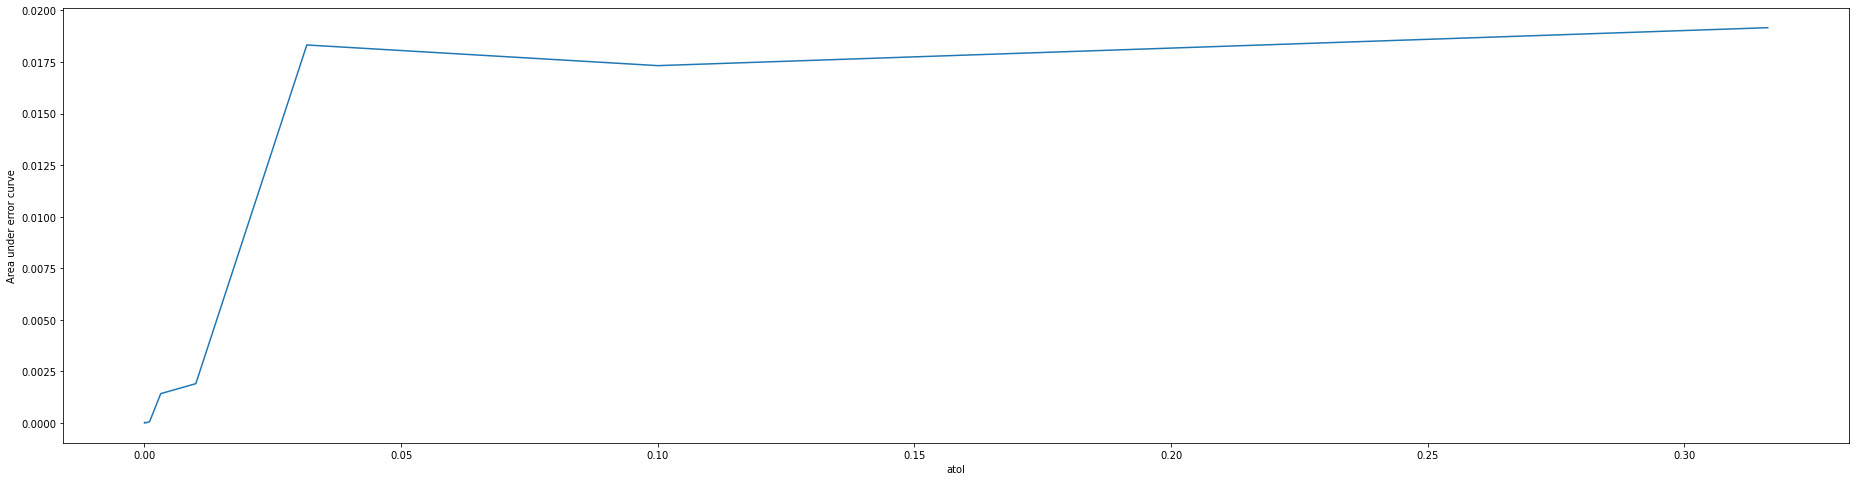

In [50]:
error_area_atol = []
for i in qutip_atol_error:
    error_area_atol.append( np.trapz(times, i))
p = plt.figure(1)
p.set_figwidth(32)
p.set_figheight(8)
p = plt.subplot()
p.plot(atols, error_area_atol)
p.set_xlabel('atol') 
p.set_ylabel('Area under error curve') 
plt.show() 

# RTOL

In [51]:
# use a constant step size
dt = 0.1
times = []
t = 0
while t < max_time-dt:
    times.append(t)
    t = t + dt

# generate 20 different values of rtol
rtols = []
rtol = 1e-10
rtols.append(rtol)
for i in range(19):
    rtol = rtol*np.sqrt(10)
    rtols.append(rtol)


generate exact solution at step size dt:

In [52]:
exact_states = exact_simulate(times)
print("done generating exact solution")

done generating exact solution


generate qutip solution with different rtol:

In [53]:
qutip_rtols = []
for rtol in rtols:
    options = Options(rtol = rtol)
    qutip_rtols.append(qutip_simulate(times, options))
print("done generating qutip solution with differennt atol")

done generating qutip solution with differennt atol


Find error (error defined as the amplitude of the difference between exact state and approximate state):

In [54]:
qutip_rtol_error = []
for j in range(len(rtols)):
    error = []
    qutip_states = qutip_rtols[j]
    exact_states =  exact_states
    for i in range(len(times)):
        y = []
        y.append(qutip_states[i][0] - exact_states[i][0])
        y.append(qutip_states[i][1] - exact_states[i][1])
        y.append(qutip_states[i][2] - exact_states[i][2])
        y.append(qutip_states[i][3] - exact_states[i][3])
        error.append(np.abs(np.vdot(y, y)))
    qutip_rtol_error.append(error)
print("done finding error")    

done finding error


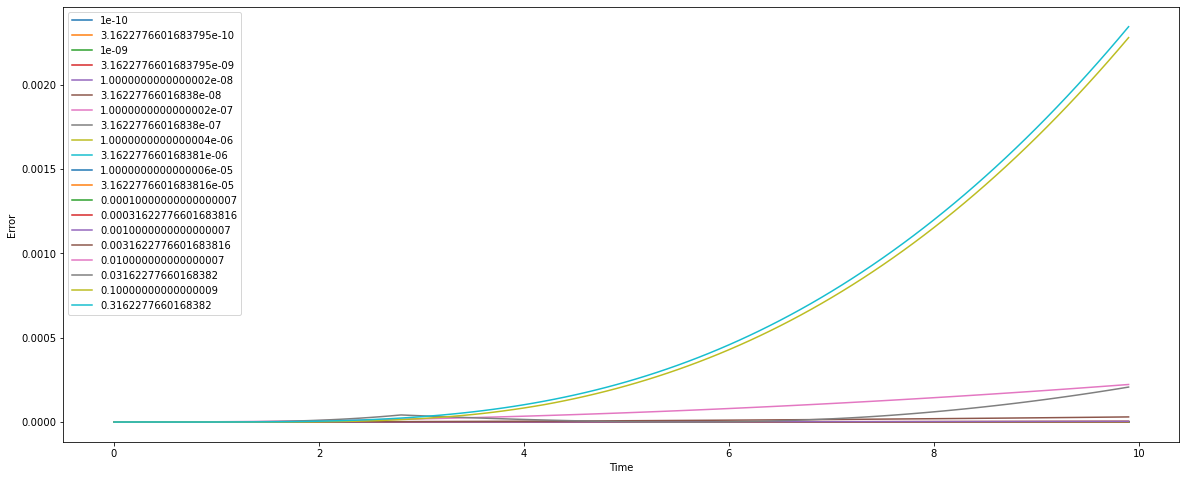

In [55]:
p = plt.figure(1)
p.set_figwidth(20)
p.set_figheight(8)
p = plt.subplot()
for i in range(len(rtols)):
    p.plot(times, qutip_rtol_error[i]) 
p.set_xlabel('Time') 
p.set_ylabel('Error') 
p.legend(atols)
plt.show() 

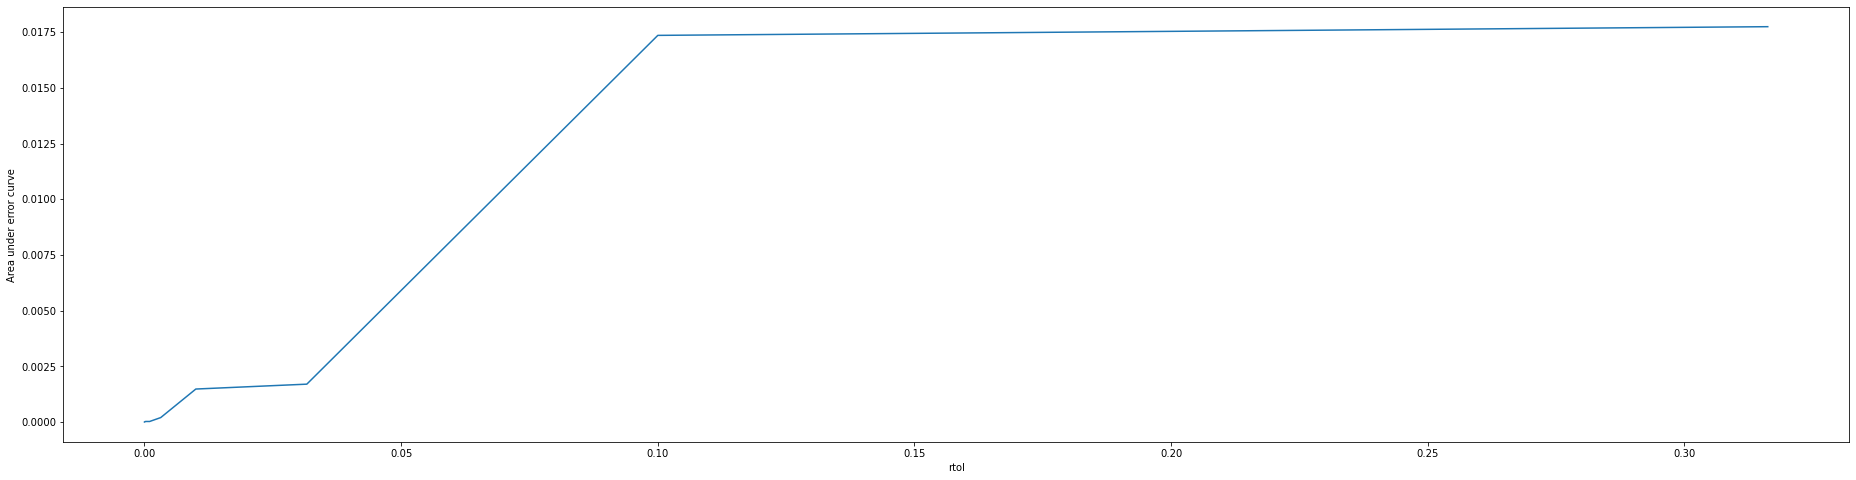

In [57]:
error_area_rtol = []
for i in qutip_rtol_error:
    error_area_rtol.append(np.trapz(times, i))
p = plt.figure(1)
p.set_figwidth(32)
p.set_figheight(8)
p = plt.subplot()
p.plot(atols, error_area_rtol)
p.set_xlabel('rtol') 
p.set_ylabel('Area under error curve') 
plt.show() 

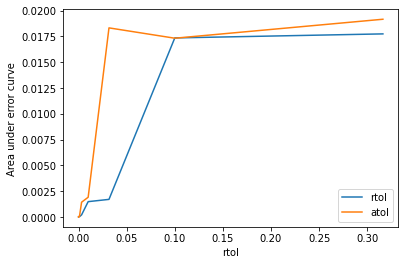

In [60]:
p = plt.figure(1)
p = plt.subplot()
p.plot(atols, error_area_rtol)
p.plot(atols, error_area_atol)
p.set_xlabel('rtol') 
p.set_ylabel('Area under error curve') 
p.legend(("rtol", "atol",))
plt.show() 